The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
 
Link to the case file: vehicle.csv

    
The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns


In [5]:
df = pd.read_csv("vehicle.csv")
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [8]:
df1 = df[df.isna().any(axis=1)]
df1

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

In [11]:
df.fillna(df.mean(), inplace=True)

In [14]:
df2 = df[df.isna().any(axis=1)]
df2

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [15]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [16]:
df['class'] = df['class'].replace({'car': 1, 'van': 2, 'bus':3})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

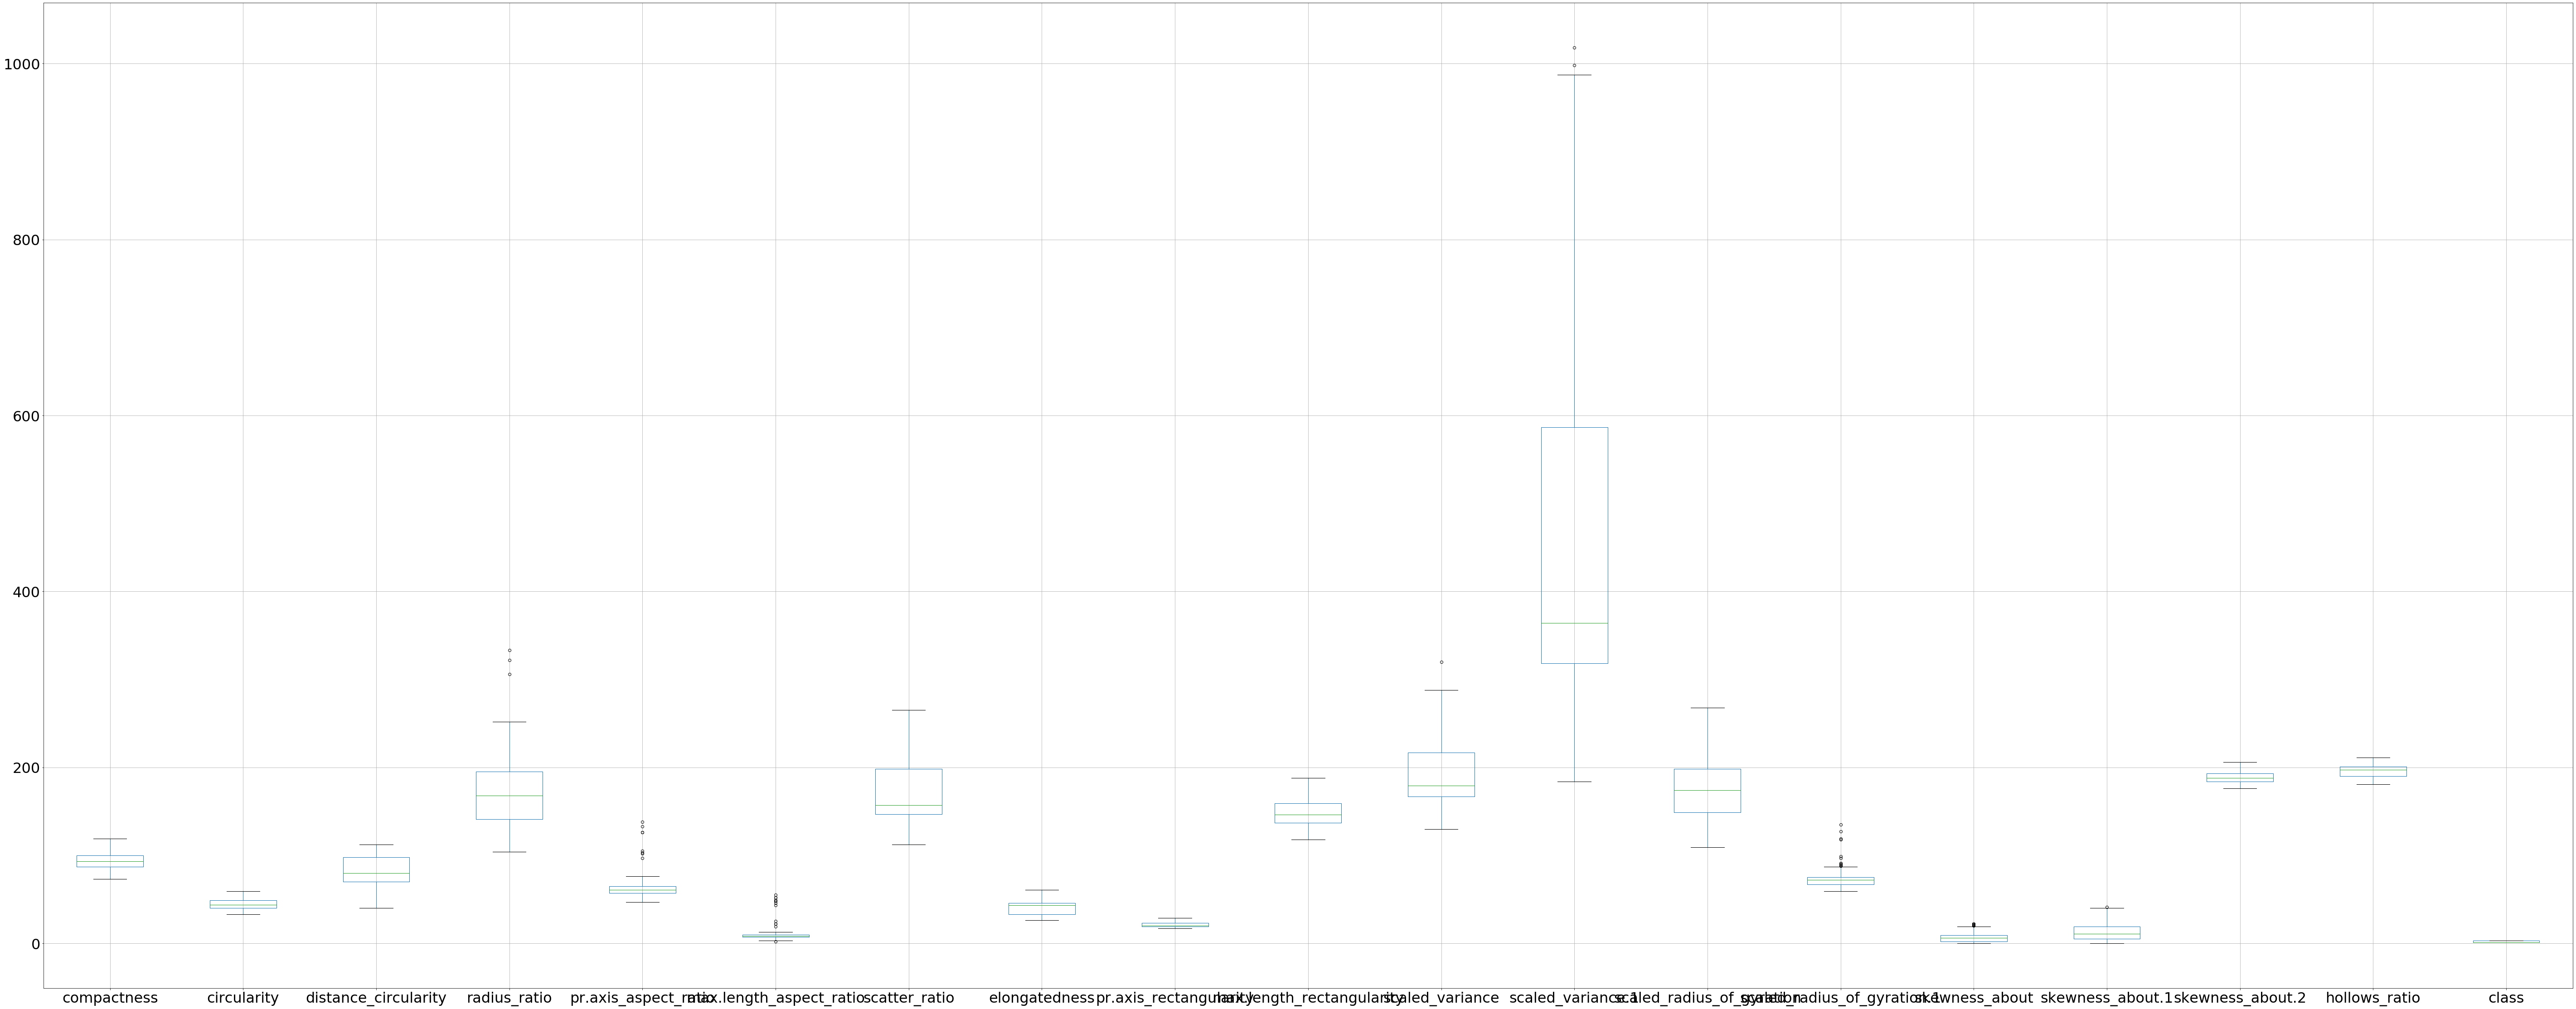

In [34]:
df.boxplot(figsize=(100,40),fontsize=32)

In [ ]:
# Though there are outliers, for now we are retaining it as is. 

2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



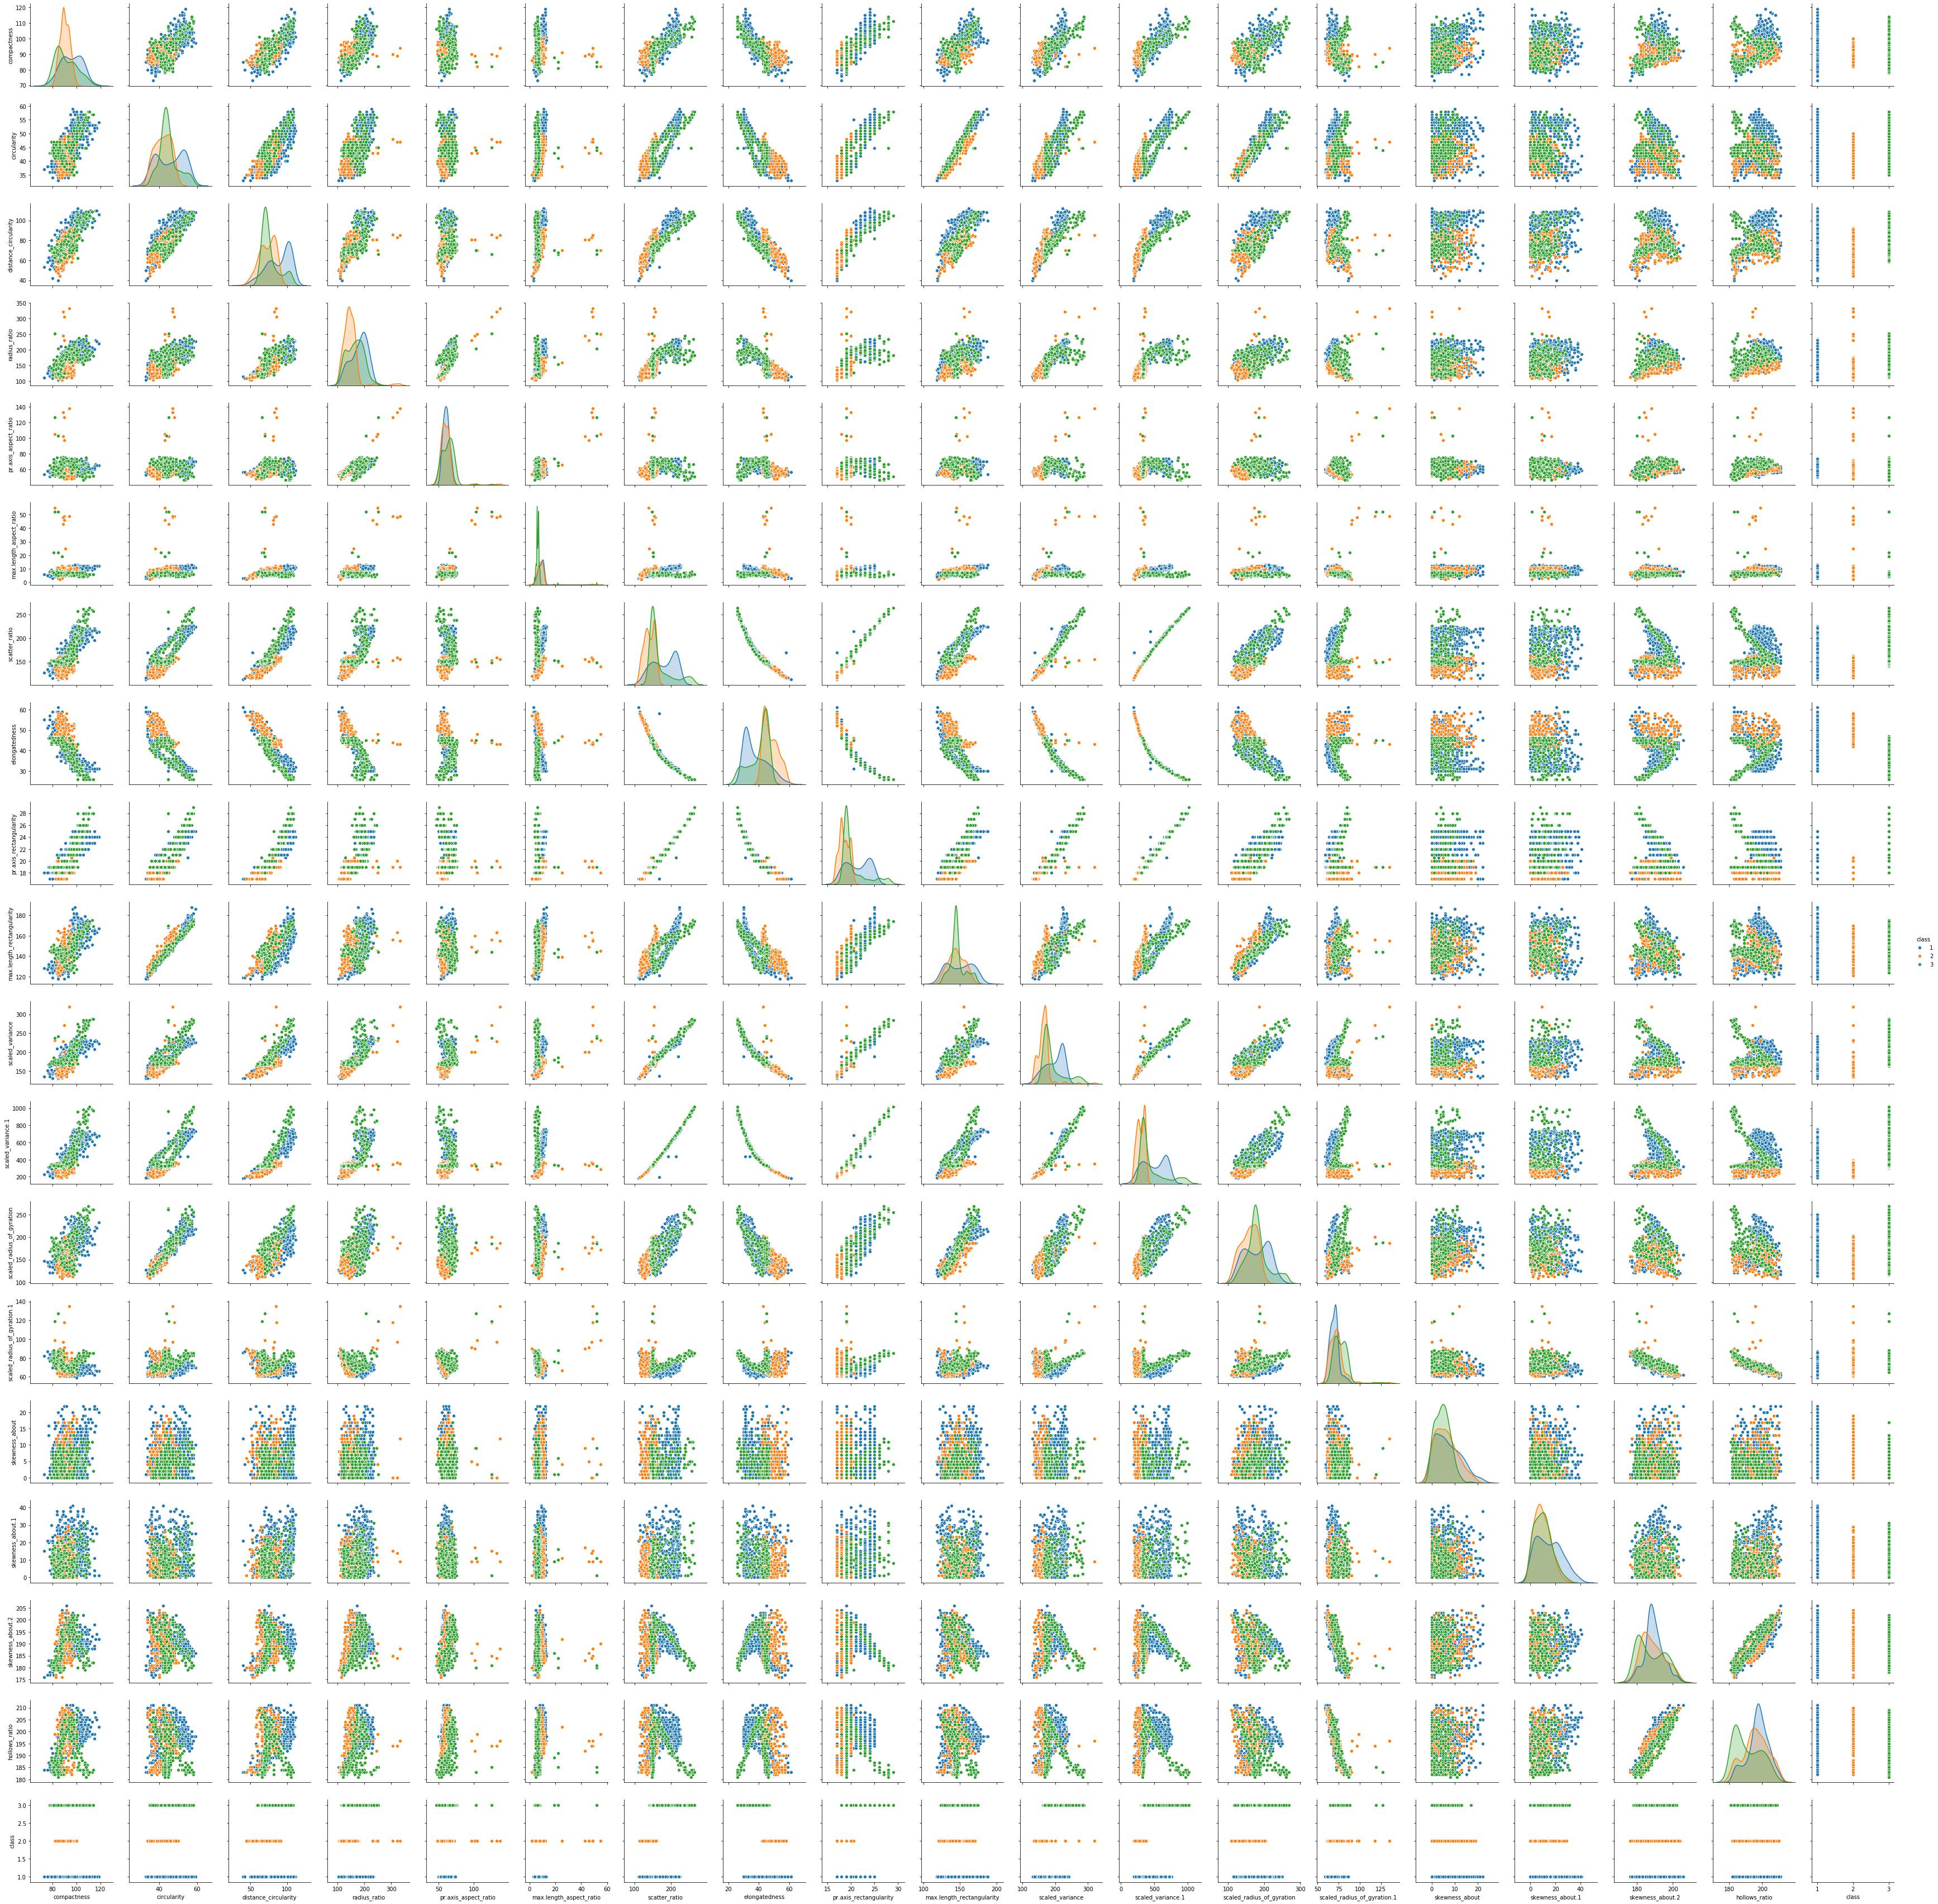

In [35]:
sns.pairplot(df, diag_kind='kde', hue = 'class') 

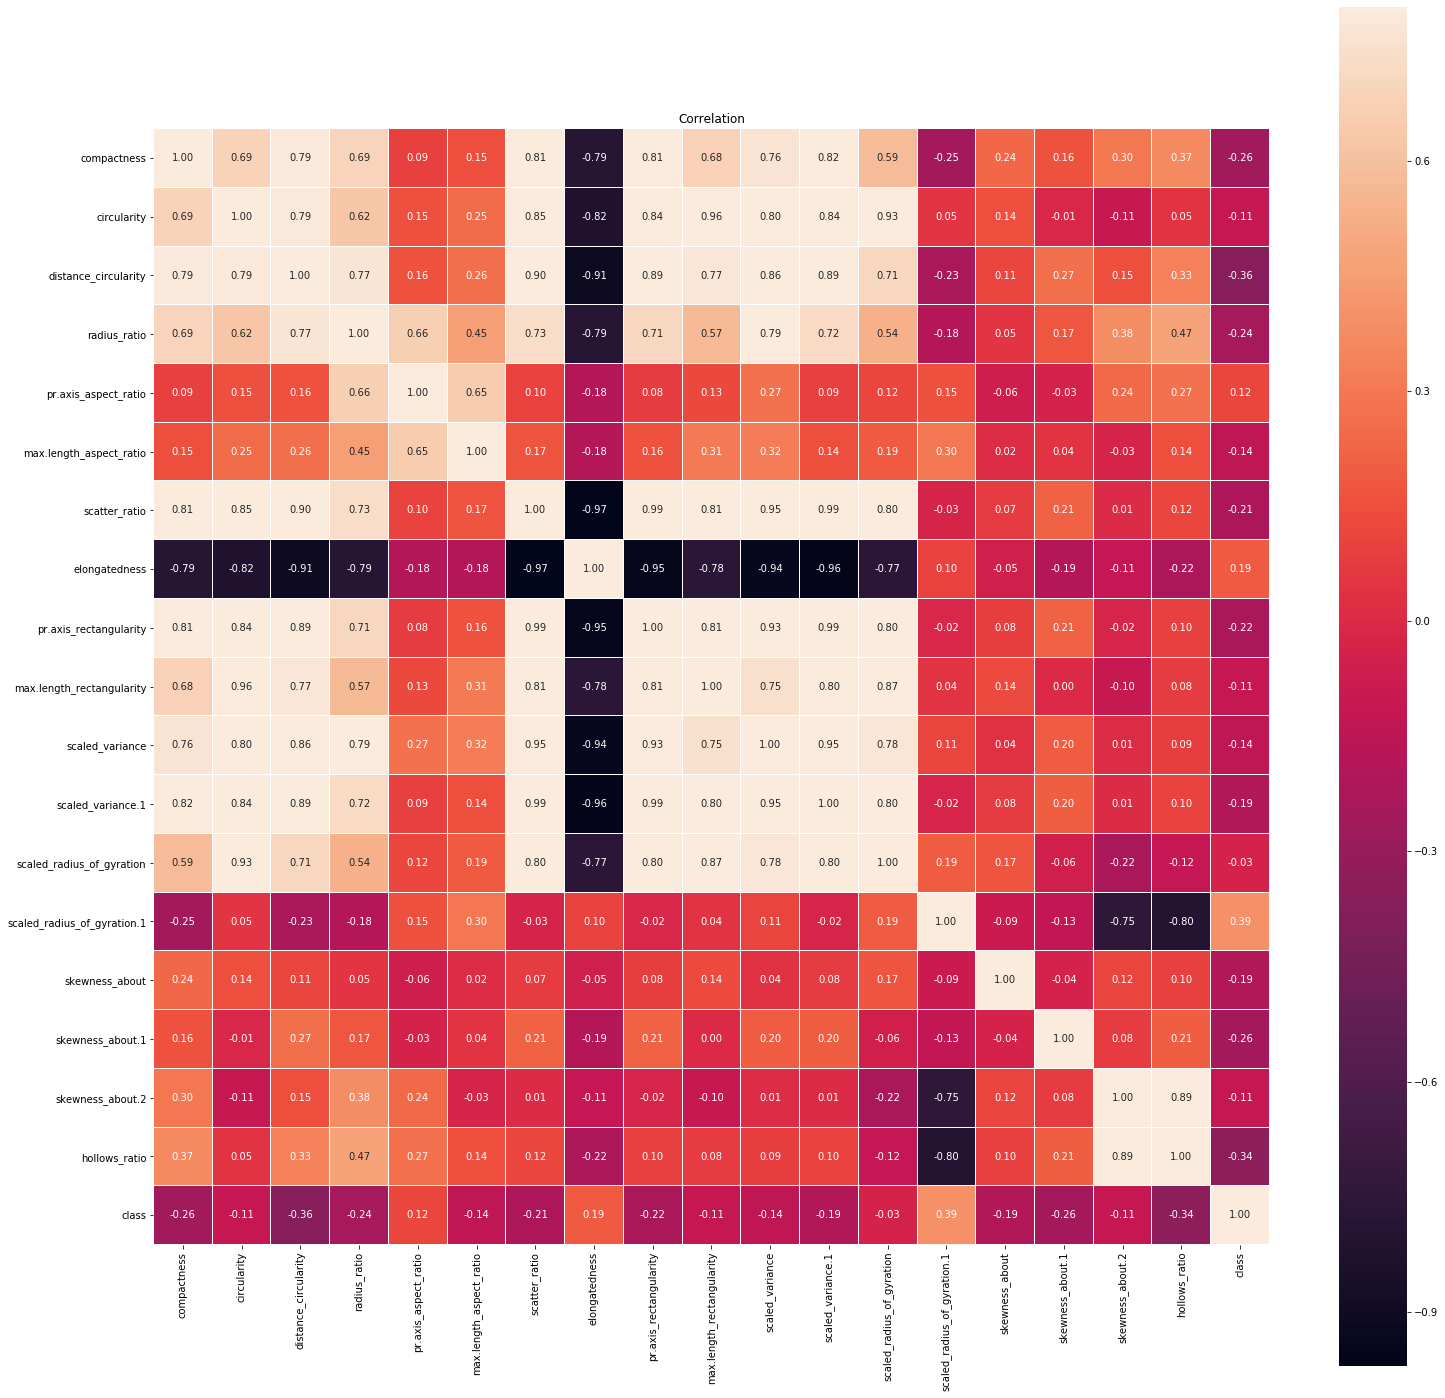

In [36]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

In [ ]:
# Based on the correlation matrix above, we are unable to determine with surety which columns may be dropped for determination 
# of class column.
# There is high correlation (both positive and negative) between some columns of independent variables.

3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [50]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:18]
y = df.iloc[:,18]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)


X_train_std = X_train.apply(zscore) # scale training and test data independently to prevent data leaks
X_test_std = X_test.apply(zscore)


           0
0   0.520168
1   0.686287
2   0.796726
3   0.863319
4   0.912783
5   0.942038
6   0.961744
7   0.973761
8   0.982711
9   0.987560
10  0.991147
11  0.993683
12  0.995608
13  0.997133
14  0.998314
15  0.999254
16  0.999796
17  1.000000


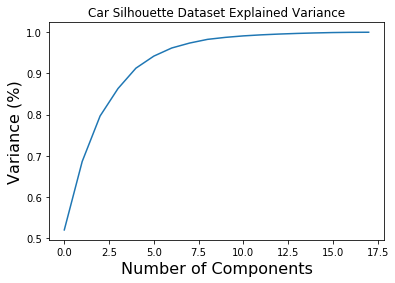

In [80]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_std)

cum_var = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_))
print (cum_var)

#Plotting the Cumulative Summation of the Explained Variance
font = {'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components',fontdict = font)
plt.ylabel('Variance (%)' , fontdict = font) #for each component
plt.title('Car Silhouette Dataset Explained Variance')
plt.show()

In [88]:
# from above graph we can estimate that approx 96% variance is covered by using 7 components

pca2 = PCA(n_components=7)
X_train_pca = pca2.fit_transform(X_train_std)
X_test_pca = pca2.fit_transform(X_test_std)


In [90]:
print(pca.components_.shape) 
print(pca2.components_.shape)
print (X_train_std.shape)
print (X_train_pca.shape)

(18, 18)
(7, 18)
(676, 18)
(676, 7)


4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [130]:
# Modelling using SVM

from sklearn import svm
from sklearn.model_selection import GridSearchCV


classifier_svm_kernel = svm.SVC(C=0.01 , gamma='auto', kernel = 'rbf') 
classifier_svm_kernel.fit(X_train_pca, y_train)

y_pred = classifier_svm_kernel.predict(X_test_pca)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[90  0  0]
 [43  0  0]
 [37  0  0]]


[0.49275362 0.5        0.5        0.5        0.5        0.5
 0.50746269 0.50746269 0.50746269 0.5       ]


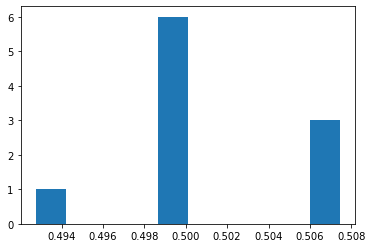

In [123]:
#Applying k-fold validation here with PCA components
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_svm_kernel,X=X_train_pca,y=y_train,cv=10)
print(accuracies)
plt.hist(accuracies)
plt.show()

[0.49275362 0.5        0.5        0.5        0.5        0.5
 0.50746269 0.50746269 0.50746269 0.5       ]


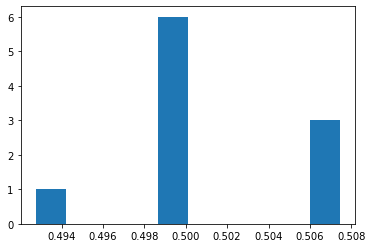

In [124]:
#Applying k-fold validation here with original columns
from sklearn.model_selection import cross_val_score
accuracies_orig = cross_val_score(estimator=classifier_svm_kernel,X=X_train_std , y=y_train,cv=10)
print(accuracies_orig)
plt.hist(accuracies_orig)
plt.show()

In [153]:
# Using rbf kernel
parameters1 = [{'C':[0.01,0.05,0.5,1], 'kernel':['rbf'], 'gamma' :['auto']}]
grid_search = GridSearchCV(estimator=classifier_svm_kernel, param_grid=parameters1, scoring ='accuracy',cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train_pca,y_train)


In [154]:
best_accuracy = grid_search.best_score_
print ("Best Accuracy score: ",best_accuracy)

Best Accuracy score:  0.915680473372781


In [155]:
opt_param = grid_search.best_params_
print( "Optimal parameters: ",opt_param)

Optimal parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [156]:
# Using linear kernel
parameters2 = [{'C':[0.01,0.05,0.5,1], 'kernel':['linear'], 'gamma' :['auto']}]
grid_search = GridSearchCV(estimator=classifier_svm_kernel, param_grid=parameters2, scoring ='accuracy',cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train_pca,y_train)

In [157]:
best_accuracy = grid_search.best_score_
print ("Best Accuracy score: ",best_accuracy)

Best Accuracy score:  0.8210059171597633


In [158]:
opt_param = grid_search.best_params_
print( "Optimal parameters: ",opt_param)

Optimal parameters:  {'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}


In [160]:
# Retrying with different PCA components


pca3 = PCA(n_components= 9) # here you can change this number to play around
X_train_pca3 = pca3.fit_transform(X_train_std)
X_test_pca3 = pca3.transform(X_test_std)

#Create classifier object
classifier_svm_kernel = svm.SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(X_train_pca3,y_train)

# Grid search and k fold validation libraries already imported. So start the grid search
grid_search = GridSearchCV(estimator=classifier_svm_kernel, param_grid=parameters1, scoring ='accuracy',cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train_pca3,y_train)

best_accuracy = grid_search.best_score_
print ("Best Accuracy score: ",best_accuracy)
opt_param = grid_search.best_params_
print( "Optimal parameters: ",opt_param)

Best Accuracy score:  0.9511834319526628
Optimal parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
